# **Import Libraries and modules**

In [10]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

2019-09-01 01:44:10.357311


In [11]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-09-01 01:44:11.869291


### Load pre-shuffled MNIST data into train and test sets

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-09-01 01:44:15.951812


(60000, 28, 28)
2019-09-01 01:44:17.729721


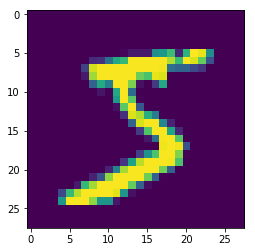

In [13]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [14]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-09-01 01:44:20.059236


In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-09-01 01:44:21.409809


In [16]:
y_train[:10]
print(datetime.datetime.now())

2019-09-01 01:44:23.522248


In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
#print(datetime.datetime.now())

In [18]:
Y_train[:10]
#print(datetime.datetime.now())

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
## MAIN BLOCK

from keras.layers import Activation,Input
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.models import Model

inp = Input(shape=(28,28,1))
x1 = Conv2D(32, kernel_size=3, activation='relu')(inp)
x2 = Conv2D(32, kernel_size=3, activation='relu',padding='SAME')(x1)
x3 = keras.layers.Add()([x1, x2])
x4 = MaxPooling2D(pool_size=(2, 2))(x3)
x5 = Conv2D(32, kernel_size=3, activation='relu',padding='SAME')(x4)
x6 = keras.layers.Add()([x4, x5])
x7 = keras.layers.Add()([x4, x5,x6])
x8 = MaxPooling2D(pool_size=(2, 2))(x7)
x9 = Conv2D(32, kernel_size=3, activation='relu',padding='SAME')(x8)
x10 = keras.layers.Add()([x8, x9])
x11 = keras.layers.Add()([x8, x9,x10])
x12 = Conv2D(10, kernel_size=6, activation='softmax')(x8)

output = Flatten()(x12)

model = Model(inputs=inp, outputs=output)

print(model.summary())

print(datetime.datetime.now())

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_117 (Conv2D)             (None, 26, 26, 32)   320         input_29[0][0]                   
__________________________________________________________________________________________________
conv2d_118 (Conv2D)             (None, 26, 26, 32)   9248        conv2d_117[0][0]                 
__________________________________________________________________________________________________
add_51 (Add)                    (None, 26, 26, 32)   0           conv2d_117[0][0]                 
                                                                 conv2d_118[0][0]          

In [51]:
model.summary()

print(datetime.datetime.now())

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_117 (Conv2D)             (None, 26, 26, 32)   320         input_29[0][0]                   
__________________________________________________________________________________________________
conv2d_118 (Conv2D)             (None, 26, 26, 32)   9248        conv2d_117[0][0]                 
__________________________________________________________________________________________________
add_51 (Add)                    (None, 26, 26, 32)   0           conv2d_117[0][0]                 
                                                                 conv2d_118[0][0]          

In [52]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

W0901 02:21:14.726270 139939316811648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0901 02:21:14.756100 139939316811648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



2019-09-01 02:21:14.771183


In [53]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0901 02:21:19.434651 139939316811648 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0901 02:21:19.662904 139939316811648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 17s 275us/step - loss: 0.1563 - acc: 0.9513
Epoch 2/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0547 - acc: 0.9833
Epoch 3/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0417 - acc: 0.9872
Epoch 4/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0329 - acc: 0.9896
Epoch 5/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0268 - acc: 0.9917
Epoch 6/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0223 - acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0186 - acc: 0.9936
Epoch 8/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0171 - acc: 0.9945
Epoch 9/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0135 - acc: 0.9956
Epoch 10/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0121 - 

In [54]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-09-01 02:22:57.846026


In [55]:
print(score)
print(datetime.datetime.now())

[0.028546976751869714, 0.9921]
2019-09-01 02:22:57.854812
